##Proyek Akhir Machine Learning Terapan: Sistem Rekomendasi Buku

###Menyiapkan Library yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

###Menyiapkan Dataset

In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d 'jalota/books-dataset'

  0% 0.00/537k [00:00<?, ?B/s]
100% 537k/537k [00:00<00:00, 92.6MB/s]


In [7]:
!unzip /content/books-dataset.zip

Archive:  /content/books-dataset.zip
  inflating: Book_Dataset_1.csv      


In [8]:
book_df = pd.read_csv('Book_Dataset_1.csv')

###Data Understanding

In [9]:
book_df

,Unnamed: 0,Title,Category,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Book_Description,Image_Link,Stars
0,0,A Light in the Attic,Poetry,51.77,51.77,0.0,22,0,It's hard to imagine a world without A Light i...,http://books.toscrape.com/media/cache/fe/72/fe...,3
1,1,Tipping the Velvet,Historical Fiction,53.74,53.74,0.0,20,0,"""Erotic and absorbing...Written with starling ...",http://books.toscrape.com/media/cache/08/e9/08...,1
2,2,Soumission,Fiction,50.10,50.10,0.0,20,0,"Dans une France assez proche de la nÃ´tre, un ...",http://books.toscrape.com/media/cache/ee/cf/ee...,1
3,3,Sharp Objects,Mystery,47.82,47.82,0.0,20,0,"WICKED above her hipbone, GIRL across her hear...",http://books.toscrape.com/media/cache/c0/59/c0...,4
4,4,Sapiens: A Brief History of Humankind,History,54.23,54.23,0.0,20,0,From a renowned historian comes a groundbreaki...,http://books.toscrape.com/media/cache/ce/5f/ce...,5
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,Classics,55.53,55.53,0.0,1,0,\n\n\n\n\n\n,http://books.toscrape.com/media/cache/99/df/99...,1
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,57.06,57.06,0.0,1,0,High school student Kei Nagai is struck dead i...,http://books.toscrape.com/media/cache/30/98/30...,4
997,997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,16.97,16.97,0.0,1,0,"In Englandâs Regency era, manners and elegan...",http://books.toscrape.com/media/cache/f9/6b/f9...,5
998,998,1st to Die (Women's Murder Club #1),Mystery,53.98,53.98,0.0,1,0,"James Patterson, bestselling author of the Ale...",http://books.toscrape.com/media/cache/f6/8e/f6...,1


In [10]:
first_column = book_df.columns[0]
book_df = book_df.rename(columns={first_column : 'book_id'})
book_df

,book_id,Title,Category,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Book_Description,Image_Link,Stars
0,0,A Light in the Attic,Poetry,51.77,51.77,0.0,22,0,It's hard to imagine a world without A Light i...,http://books.toscrape.com/media/cache/fe/72/fe...,3
1,1,Tipping the Velvet,Historical Fiction,53.74,53.74,0.0,20,0,"""Erotic and absorbing...Written with starling ...",http://books.toscrape.com/media/cache/08/e9/08...,1
2,2,Soumission,Fiction,50.10,50.10,0.0,20,0,"Dans une France assez proche de la nÃ´tre, un ...",http://books.toscrape.com/media/cache/ee/cf/ee...,1
3,3,Sharp Objects,Mystery,47.82,47.82,0.0,20,0,"WICKED above her hipbone, GIRL across her hear...",http://books.toscrape.com/media/cache/c0/59/c0...,4
4,4,Sapiens: A Brief History of Humankind,History,54.23,54.23,0.0,20,0,From a renowned historian comes a groundbreaki...,http://books.toscrape.com/media/cache/ce/5f/ce...,5
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,Classics,55.53,55.53,0.0,1,0,\n\n\n\n\n\n,http://books.toscrape.com/media/cache/99/df/99...,1
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,57.06,57.06,0.0,1,0,High school student Kei Nagai is struck dead i...,http://books.toscrape.com/media/cache/30/98/30...,4
997,997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,16.97,16.97,0.0,1,0,"In Englandâs Regency era, manners and elegan...",http://books.toscrape.com/media/cache/f9/6b/f9...,5
998,998,1st to Die (Women's Murder Club #1),Mystery,53.98,53.98,0.0,1,0,"James Patterson, bestselling author of the Ale...",http://books.toscrape.com/media/cache/f6/8e/f6...,1


In [11]:
print('Jumlah data buku: ', len(book_df.book_id.unique()))

Jumlah data buku:  1000


In [12]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_id            1000 non-null   int64  
 1   Title              1000 non-null   object 
 2   Category           1000 non-null   object 
 3   Price              1000 non-null   float64
 4   Price_After_Tax    1000 non-null   float64
 5   Tax_amount         1000 non-null   float64
 6   Avilability        1000 non-null   int64  
 7   Number_of_reviews  1000 non-null   int64  
 8   Book_Description   1000 non-null   object 
 9   Image_Link         1000 non-null   object 
 10  Stars              1000 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [13]:
book_df.describe()

,book_id,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Stars
count,1000.000000,1000.00000,1000.00000,1000.0,1000.000000,1000.0,1000.000000
mean,499.500000,35.07035,35.07035,0.0,8.585000,0.0,2.923000
std,288.819436,14.44669,14.44669,0.0,5.654622,0.0,1.434967
min,0.000000,10.00000,10.00000,0.0,1.000000,0.0,1.000000
25%,249.750000,22.10750,22.10750,0.0,3.000000,0.0,2.000000
50%,499.500000,35.98000,35.98000,0.0,7.000000,0.0,3.000000
75%,749.250000,47.45750,47.45750,0.0,14.000000,0.0,4.000000
max,999.000000,59.99000,59.99000,0.0,22.000000,0.0,5.000000


In [14]:
print('Banyak kategori buku: ', len(book_df.Category.unique()))

Banyak kategori buku:  50


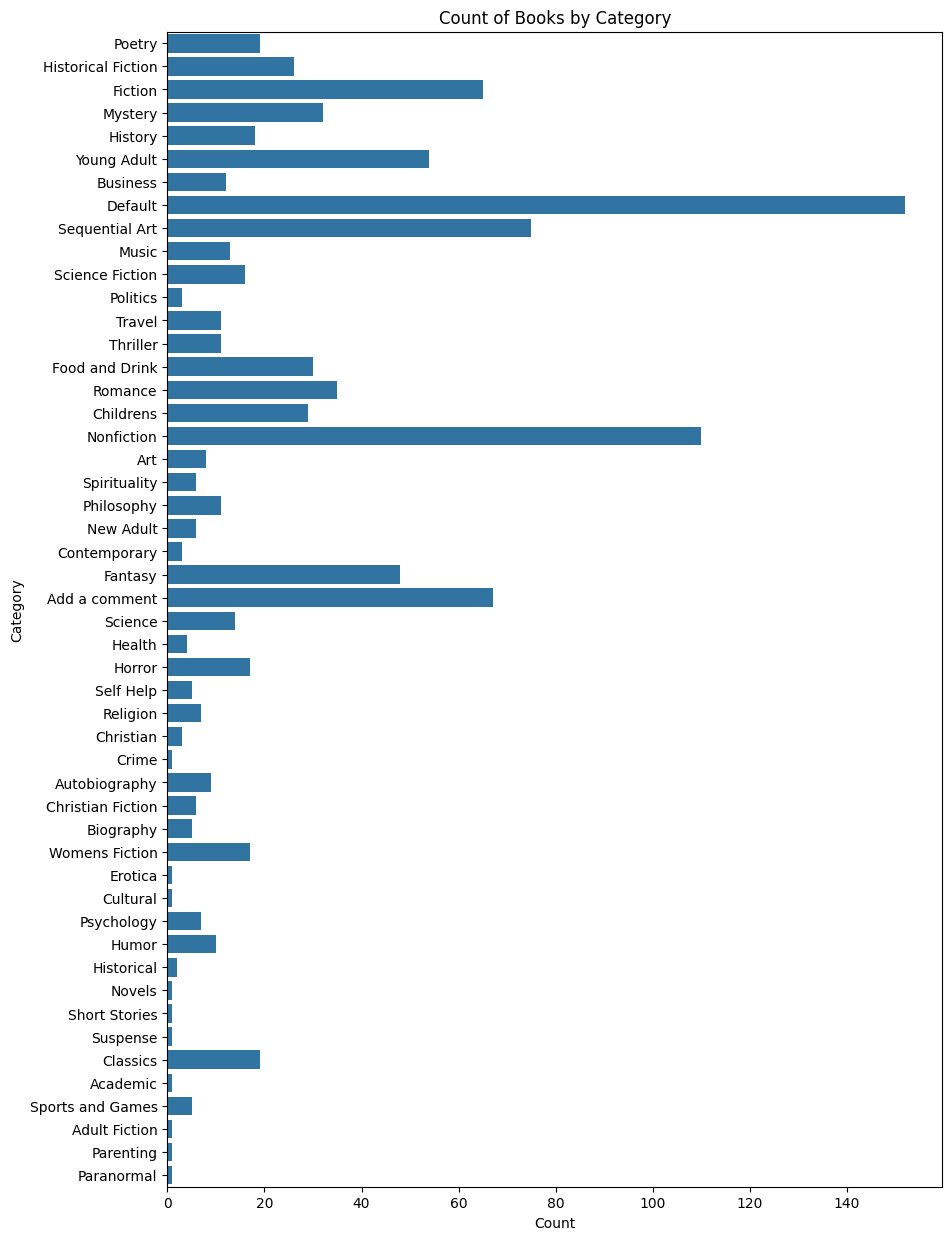

In [15]:
plt.figure(figsize=(10, 15))
sns.countplot(data=book_df, y='Category')
plt.title('Count of Books by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

###Data Preparation

In [16]:
book_df.isnull().sum()

book_id              0
Title                0
Category             0
Price                0
Price_After_Tax      0
Tax_amount           0
Avilability          0
Number_of_reviews    0
Book_Description     0
Image_Link           0
Stars                0
dtype: int64

In [17]:
book_df = book_df.drop_duplicates()

In [18]:
book_id = book_df['book_id'].tolist()
book_title = book_df['Title'].tolist()
book_category = book_df['Category'].tolist()

print(len(book_id))
print(len(book_title))
print(len(book_category))

1000
1000
1000


In [19]:
book_new = pd.DataFrame({
    'id': book_id,
    'title': book_title,
    'category': book_category
})
book_new

,id,title,category
0,0,A Light in the Attic,Poetry
1,1,Tipping the Velvet,Historical Fiction
2,2,Soumission,Fiction
3,3,Sharp Objects,Mystery
4,4,Sapiens: A Brief History of Humankind,History
...,...,...,...
995,995,Alice in Wonderland (Alice's Adventures in Won...,Classics
996,996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art
997,997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction
998,998,1st to Die (Women's Murder Club #1),Mystery


###Modeling and Result: Content-Based Filtering

In [20]:
data = book_new

In [21]:
tf = TfidfVectorizer()

tf.fit(data['category'])

tf.get_feature_names_out()

array(['academic', 'add', 'adult', 'and', 'art', 'autobiography',
       'biography', 'business', 'childrens', 'christian', 'classics',
       'comment', 'contemporary', 'crime', 'cultural', 'default', 'drink',
       'erotica', 'fantasy', 'fiction', 'food', 'games', 'health', 'help',
       'historical', 'history', 'horror', 'humor', 'music', 'mystery',
       'new', 'nonfiction', 'novels', 'paranormal', 'parenting',
       'philosophy', 'poetry', 'politics', 'psychology', 'religion',
       'romance', 'science', 'self', 'sequential', 'short',
       'spirituality', 'sports', 'stories', 'suspense', 'thriller',
       'travel', 'womens', 'young'], dtype=object)

In [22]:
tfidf_matrix = tf.fit_transform(data['category'])

tfidf_matrix.shape

(1000, 53)

In [23]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]])

In [24]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.title
).sample(22, axis=1).sample(10, axis=0)

,humor,sports,sequential,help,christian,drink,horror,womens,self,cultural,...,young,science,games,default,art,academic,biography,politics,and,suspense
title,,,,,,,,,,,,,,,,,,,,,
The Odyssey,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Cinder (The Lunar Chronicles #1),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.718045,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
The Lover's Dictionary,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
Lust & Wonder,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
The Name of the Wind (The Kingkiller Chronicle #1),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
Without Borders (Wanderlove #1),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
"Fruits Basket, Vol. 1 (Fruits Basket #1)",0.0,0.0,0.717064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.697007,0.0,0.0,0.0,0.0,0.0
"A Piece of Sky, a Grain of Rice: A Memoir in Four Meditations",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0
"Naruto (3-in-1 Edition), Vol. 14: Includes Vols. 40, 41 & 42 (Naruto: Omnibus #14)",0.0,0.0,0.717064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.697007,0.0,0.0,0.0,0.0,0.0


In [25]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.55448623, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.55448623, 1.        , ..., 0.55448623, 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.55448623, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [26]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1000, 1000)


title,Changing the Game (Play by Play #2),Playing with Fire,Me Talk Pretty One Day,Annie on My Mind,Civilization and Its Discontents
title,,,,,
The Third Wave: An Entrepreneurâs Vision of the Future,0.0,0.0,0.0,0.0,0.0
Neither Here nor There: Travels in Europe,0.0,0.0,0.0,0.0,0.0
The Perfect Play (Play by Play #1),1.0,0.0,0.0,0.0,0.0
Shatter Me (Shatter Me #1),0.0,0.0,0.0,0.0,0.0
Luis Paints the World,0.0,0.0,0.0,0.0,0.0
Holidays on Ice,0.0,0.0,0.0,0.0,0.0
"Eat, Pray, Love",0.0,0.0,0.0,0.0,0.0
The Darkest Lie,0.0,0.0,0.0,1.0,0.0
Life Without a Recipe,0.0,0.0,1.0,0.0,0.0


In [27]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=data[['title', 'category']], k=10):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_buku].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_buku, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [28]:
# Mendapatkan rekomendasi buku
book_recommendations("1st to Die (Women's Murder Club #1)")

,title,category
0,The Cuckoo's Calling (Cormoran Strike #1),Mystery
1,A Murder in Time,Mystery
2,Playing with Fire,Mystery
3,A Time of Torment (Charlie Parker #14),Mystery
4,Hide Away (Eve Duncan #20),Mystery
5,The Silkworm (Cormoran Strike #2),Mystery
6,A Study in Scarlet (Sherlock Holmes #1),Mystery
7,Most Wanted,Mystery
8,Murder at the 42nd Street Library (Raymond Amb...,Mystery
9,The Murder of Roger Ackroyd (Hercule Poirot #4),Mystery


###Evaluation

In [29]:
book_recommendations('Tipping the Velvet')

,title,category
0,While You Were Mine,Historical Fiction
1,The House by the Lake,Historical Fiction
2,Between Shades of Gray,Historical Fiction
3,World Without End (The Pillars of the Earth #2),Historical Fiction
4,Girl in the Blue Coat,Historical Fiction
5,Mrs. Houdini,Historical Fiction
6,The Guernsey Literary and Potato Peel Pie Society,Historical Fiction
7,A Flight of Arrows (The Pathfinders #2),Historical Fiction
8,The Secret Healer,Historical Fiction
9,Girl With a Pearl Earring,Historical Fiction


Evaluasi model dilakukan menggunakan metric Recommender System Precision. Nilai precision didapatkan dengan membandingkan jumlah rekomendasi yang relevan dengan total items yang direkomendasikan.
Pada percobaan permintaan top 10 rekomendasi, didapati bahwa semuanya relevan dengan kategori dari buku yang di-input. Oleh karena itu, Sistem rekomendasi buku dengan content-based filtering yang telah dibuat memiliki precision sebesar 100%